In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('AR - Examples - 1.5.csv')

In [4]:
data.shape

(120, 2)

In [5]:
data.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


In [6]:
data.isnull().mean()*100

time        0.0
distance    0.0
dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      120 non-null    int64  
 1   distance  120 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [8]:
data.describe()

,time,distance
count,120.000000,120.000000
mean,60.500000,4.521422
std,34.785054,1.035602
min,1.000000,0.419660
25%,30.750000,4.032310
50%,60.500000,4.713232
75%,90.250000,5.271642
max,120.000000,5.960392


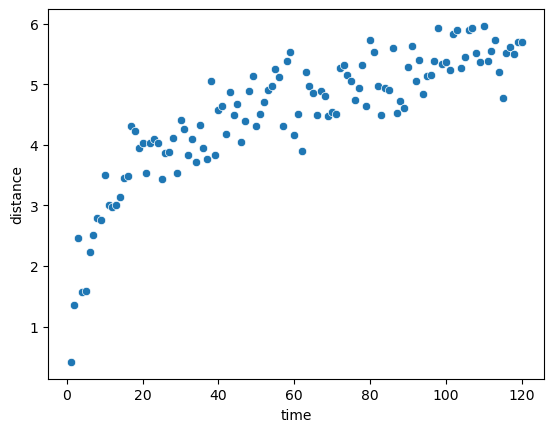

In [9]:
sns.scatterplot(x = data['time'], y =  data['distance'])
plt.show()

Above plot shows a non-linear treand. Logarithmic trend is following.

## Build linear model first

In [10]:
X = np.array(data['time']).reshape(-1, 1)
y = np.array(data['distance']).reshape(-1, 1)

In [11]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [12]:
y_pred = lr.predict(X)

In [13]:
r2_score(y, y_pred)

0.7019700219367477

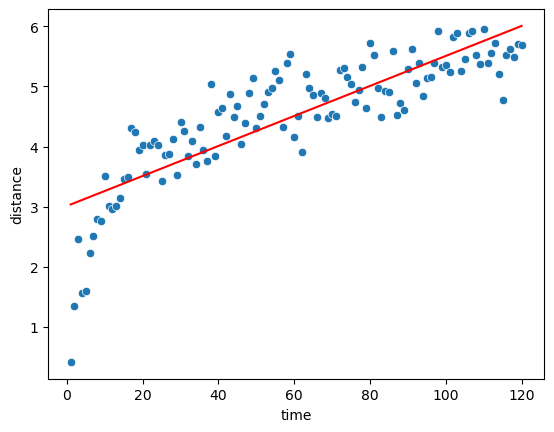

In [14]:
sns.scatterplot(x = data['time'], y =  data['distance'])
plt.plot(X, y_pred, color='r')
plt.show()

In [15]:
mean_squared_error(y, y_pred)**0.5

0.5629965101187553

In [16]:
error_terms = y-y_pred

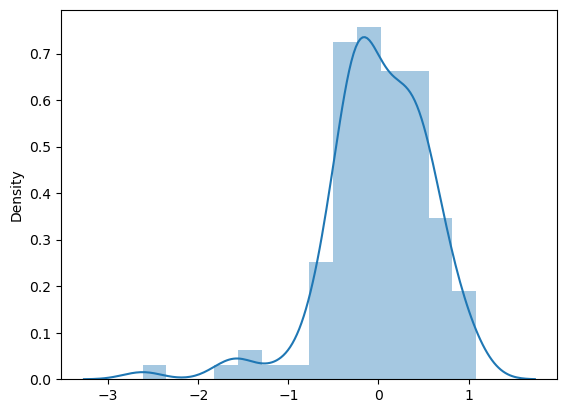

In [17]:
sns.distplot(error_terms)
plt.show()

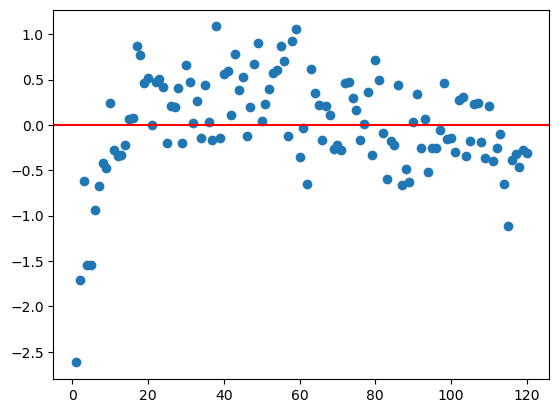

In [18]:
plt.scatter(X, error_terms)
plt.axhline(color='r')
plt.show()

Linear model is not following the assumptions of linear regression. Since it is following a log trend hence we will transform the data in log scale.

## Transform the data into log scale

In [19]:
data['time(log)'] = np.log(data['time'])
data.head()

,time,distance,time(log)
0,1,0.419660,0.000000
1,2,1.350692,0.693147
2,3,2.470342,1.098612
3,4,1.566856,1.386294
4,5,1.595280,1.609438


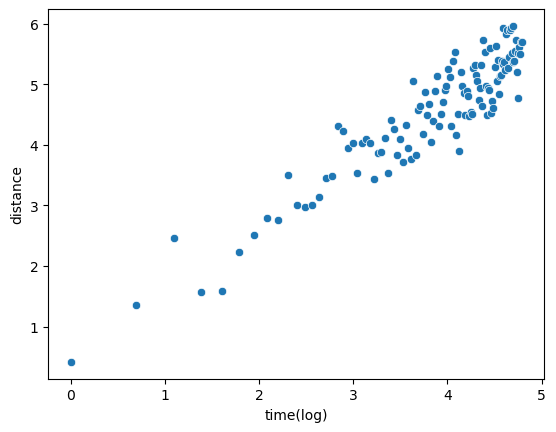

In [20]:
sns.scatterplot(x=data['time(log)'], y=data['distance'])
plt.show()

Now it is showing a linear trend.

In [21]:
X = np.array(data['time(log)']).reshape(-1, 1)
y = np.array(data['distance']).reshape(-1, 1)

In [22]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [23]:
y_pred = lr.predict(X)

In [24]:
r2_score(y, y_pred)

0.8717123012103077

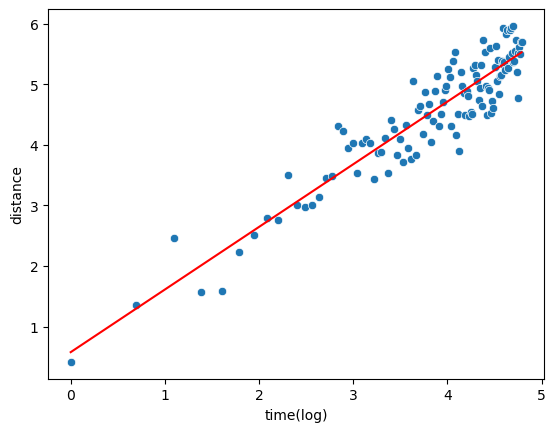

In [25]:
sns.scatterplot(x=data['time(log)'], y=data['distance'])
plt.plot(X, y_pred, color='r')
plt.show()

In [26]:
mean_squared_error(y, y_pred)**0.5

0.369375626466934

In [27]:
error_terms = y-y_pred

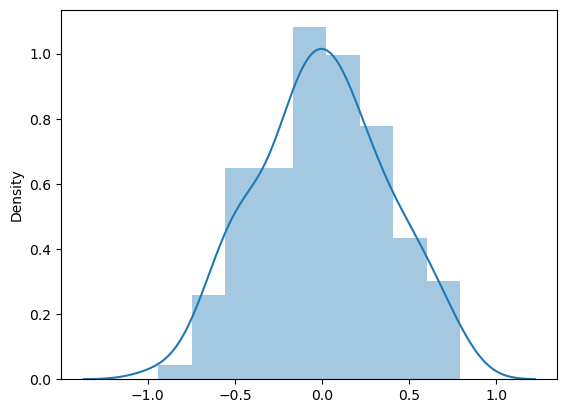

In [28]:
sns.distplot(error_terms)
plt.show()

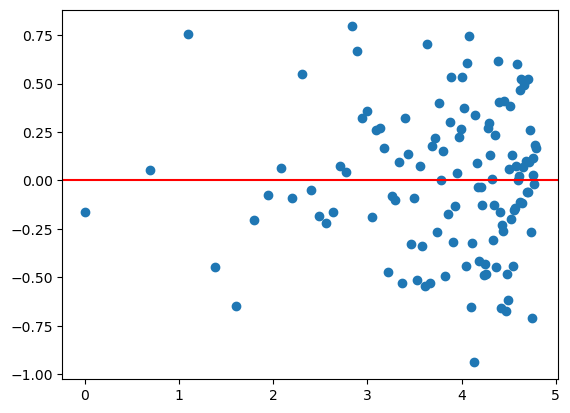

In [29]:
plt.scatter(X, error_terms)
plt.axhline(color='r')
plt.show()

Now the model has error terms which are normally distributed and have no pattern with constant variance. We can use this model.